In [64]:
### Here we are going to import packages for our analysis
import nltk; nltk.download('stopwords')

import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import itertools

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import os
import gensim
from gensim import corpora, models
import pandas as pd
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
import nltk
import os
import nltk.stem as stemmer
from pprint import pprint
import itertools
import requests
import gensim
import pandas as pd
import os
import collections
import smart_open
from nltk.tokenize import RegexpTokenizer
import gensim.models.doc2vec
import multiprocessing
import numpy as np
from scipy.sparse import csr_matrix
import nltk.tokenize 
from gensim.models.doc2vec import TaggedDocument
import pickle
import seaborn as sns
from string import digits
from collections import namedtuple
import math
import matplotlib 
from datetime import timedelta
import matplotlib.pyplot as plt
import re
import pickle
import sys
import re
import csv
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial import distance
from itertools import chain
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import sys
import numpy as np
from nltk.tokenize import RegexpTokenizer
from gensim import corpora, models
import gensim
import csv
from sklearn.externals import joblib
from string import digits
import bz2
from collections import Counter
import plotly
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
plotly.tools.set_credentials_file(username='alphonse.m.simon', api_key='tL4FDjpWNTU1xUf5sXEl')
from bs4 import BeautifulSoup
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.decomposition import PCA
import plotly.plotly as py
import plotly.graph_objs as go
import random
import numpy as np
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
stemmer = PorterStemmer()
np.random.seed(2018)
nltk.download('wordnet')
import xlsxwriter
from xlrd import open_workbook



# Defining a function that will be useful later. 

def flatten(x):
    result = []
    for el in x:
        if hasattr(el, "__iter__") and not isinstance(el, str):
            result.extend(flatten(el))
        else:
            result.append(el)
    return result



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alpho\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alpho\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Table of Contents 

The purpose of this notebook is to create an LDA Topic Model for Work Process Schedule

In [15]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [16]:
path_link = "C:/Users/alpho/Dropbox/NLP - STEM"
os.chdir(path_link)

In [17]:
work_process = pd.read_excel(open('./Data/NLP_STEM Data_final.xlsx','rb'), sheet_name=0)
community_college = pd.read_excel(open('./Data/NLP_STEM Data_final.xlsx','rb'), sheet_name=3)

In [18]:
work_process['word count'] = work_process['Text'].map(lambda x: x.count(" "))

In [19]:
work_process = work_process[work_process['word count'] > 5]


In [20]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [21]:
work_process['clean_texts'] = work_process['Text'].map(preprocess)
community_college['clean_texts'] = community_college['Text'].map(preprocess)

In [22]:
data_words = work_process['clean_texts'].tolist()

In [23]:
cc_corpus = (list(flatten(community_college['clean_texts'].tolist())))


In [24]:
data_words_cc = community_college['clean_texts'].tolist()

In [25]:
stopwords = ['student', 'cours', 'includ', 'topic', 'network', 'system', 'concept', 'fundament', 'skill', 'learn', 
            'complet', 'introduc', 'inform', 'cover', 'know', 'abil', 'abl', 'apprentic']
for i in range(len(data_words)): 
    for x in stopwords: 
        try: 
            data_words[i][:] = [z for z in data_words[i] if z != x]
        except ValueError: 
            continue

for x in stopwords:
    cc_corpus = [z for z in cc_corpus if z != x]

In [26]:
cc_corpus = ([cc_corpus, ''])

In [27]:
print(cc_corpus)

[['relat', 'databas', 'microsoft', 'access', 'design', 'creation', 'tabl', 'queri', 'form', 'report', 'satisfi', 'technolog', 'compon', 'compet', 'graduat', 'requir', 'success', 'provid', 'voucher', 'microsoft', 'offic', 'specialist', 'industri', 'certif', 'exam', 'transfer', 'work', 'team', 'identifi', 'employ', 'methodolog', 'pertin', 'assess', 'design', 'oper', 'busi', 'team', 'analyz', 'implement', 'establish', 'evolv', 'methodolog', 'develop', 'busi', 'orient', 'environ', 'develop', 'individu', 'team', 'compet', 'work', 'employ', 'current', 'softwar', 'tool', 'gener', 'illustr', 'flow', 'actual', 'develop', 'project', 'explor', 'way', 'technolog', 'enhanc', 'critic', 'think', 'literaci', 'util', 'multipl', 'softwar', 'program', 'critic', 'gather', 'diagnos', 'synthes', 'present', 'develop', 'understand', 'critic', 'think', 'deduct', 'induct', 'reason', 'scientif', 'reason', 'argument', 'analysi', 'develop', 'context', 'technolog', 'review', 'oper', 'studi', 'function', 'ratio', 'p

In [28]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\m

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\m

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\m

In [29]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [30]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
cc_corpus_ns = remove_stopwords(cc_corpus)
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

In [31]:
print(cc_corpus)

[['relat', 'databas', 'microsoft', 'access', 'design', 'creation', 'tabl', 'queri', 'form', 'report', 'satisfi', 'technolog', 'compon', 'compet', 'graduat', 'requir', 'success', 'provid', 'voucher', 'microsoft', 'offic', 'specialist', 'industri', 'certif', 'exam', 'transfer', 'work', 'team', 'identifi', 'employ', 'methodolog', 'pertin', 'assess', 'design', 'oper', 'busi', 'team', 'analyz', 'implement', 'establish', 'evolv', 'methodolog', 'develop', 'busi', 'orient', 'environ', 'develop', 'individu', 'team', 'compet', 'work', 'employ', 'current', 'softwar', 'tool', 'gener', 'illustr', 'flow', 'actual', 'develop', 'project', 'explor', 'way', 'technolog', 'enhanc', 'critic', 'think', 'literaci', 'util', 'multipl', 'softwar', 'program', 'critic', 'gather', 'diagnos', 'synthes', 'present', 'develop', 'understand', 'critic', 'think', 'deduct', 'induct', 'reason', 'scientif', 'reason', 'argument', 'analysi', 'develop', 'context', 'technolog', 'review', 'oper', 'studi', 'function', 'ratio', 'p

In [32]:
# Create Dictionary
id2word = corpora.Dictionary(data_words_bigrams)
id2word_cc = corpora.Dictionary(cc_corpus_ns)

# Create Corpus
texts = data_words_bigrams

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
corpus_cc = [id2word_cc.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 3), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)]]


In [33]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]
[[(id2word_cc[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('aaqa', 1),
  ('abbrevi', 3),
  ('abnorm', 1),
  ('abort', 1),
  ('absolut', 1),
  ('abstract', 1),
  ('absurdum', 1),
  ('academ', 1),
  ('academi', 1),
  ('accept', 1),
  ('access', 2),
  ('accomplish', 1),
  ('accord', 1),
  ('account', 1),
  ('accru', 1),
  ('accumul', 1),
  ('accur', 1),
  ('accuraci', 1)]]

In [34]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=8, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [35]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.035*"configur" + 0.029*"data" + 0.028*"window" + 0.027*"databas" + '
  '0.025*"properli" + 0.025*"design" + 0.021*"instal" + 0.021*"model" + '
  '0.020*"level" + 0.018*"user"'),
 (1,
  '0.049*"configur" + 0.041*"instal" + 0.027*"person" + 0.022*"develop" + '
  '0.020*"custom" + 0.018*"oper" + 0.016*"troubleshoot" + 0.016*"servic" + '
  '0.016*"assist" + 0.015*"basic"'),
 (2,
  '0.055*"basic" + 0.041*"commun" + 0.041*"discuss" + 0.037*"explain" + '
  '0.034*"instal" + 0.033*"organ" + 0.031*"develop" + 0.030*"support" + '
  '0.029*"perform" + 0.025*"softwar"'),
 (3,
  '0.046*"router" + 0.045*"basic" + 0.038*"switch" + 0.032*"rout" + '
  '0.023*"code" + 0.023*"protocol" + 0.017*"cisco" + 0.016*"ethernet" + '
  '0.015*"convinc" + 0.014*"internetwork"'),
 (4,
  '0.064*"secur" + 0.033*"organ" + 0.031*"commun" + 0.024*"practic" + '
  '0.023*"polici" + 0.022*"explain" + 0.021*"understand" + 0.020*"organiz" + '
  '0.018*"work" + 0.017*"discuss"'),
 (5,
  '0.068*"rout" + 0.057*"servic"

In [36]:
lda_dictionary_temp = {}
lda_dictionary = {}
lda_dataframe = {}
for x in lda_model.print_topics(): 
    lda_dictionary_temp[str(x[0])] = x[1].split('+')
    lda_dictionary_temp[str(x[0])] = [word.split('*') for word in lda_dictionary_temp[str(x[0])]]

In [37]:
df = pd.DataFrame(lda_dictionary_temp['0'][1:],columns= ['Coefficient/weight', 'Stub/word'])

In [38]:
for i in range(0,8):
    lda_dictionary[str(i)] = pd.DataFrame(lda_dictionary_temp[str(i)][0:],columns= ['Weight', 'Word'])

In [39]:
i = 3
z = 0
writer = pd.ExcelWriter('C:/Users/alpho/Dropbox/NLP - STEM/Output/Topics by WP.xlsx', engine='xlsxwriter')
workbook  = writer.book

for x in lda_dictionary: 
    i = i + 2
    lda_dictionary[x].to_excel(writer, sheet_name='Topics by WP', startcol = i, startrow = 2, index=False)
x = 3
worksheet = writer.sheets['Topics by WP']
for i in range(0,len(lda_dictionary)): 
    x = x + 2
    z = z+1
    worksheet.write(1, x, "Topic " + str(0 + z))

writer.save()



In [40]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.098674681632969

Coherence Score:  0.3368704473416483


In [41]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.015953  0.105528       1        1  23.986595
0     -0.035341  0.084414       2        1  20.901560
4     -0.079152  0.159971       3        1  20.461098
6     -0.188397 -0.189041       4        1  10.777962
7     -0.111656 -0.059253       5        1  10.176218
2     -0.014981  0.021161       6        1   7.305735
3      0.218346 -0.172233       7        1   3.540329
5      0.195228  0.049451       8        1   2.850502, topic_info=     Category        Freq          Term       Total  loglift  logprob
term                                                                 
1     Default   44.000000         basic   44.000000  30.0000  30.0000
103   Default   71.000000         secur   71.000000  29.0000  29.0000
232   Default   36.000000        servic   36.000000  28.0000  28.0000
2     Default   51.000000        commun   51.000000  27.0000  27.0000
286   Default   29.000000       project   29.000000  26.0000  26.0000
296   Default   47.000000       databas   47.000000  25.0000  25.0000
125   Default   80.000000        instal   80.000000  24.0000  24.0000
30    Default   61.000000       develop   61.000000  23.0000  23.0000
351   Default   36.000000       explain   36.000000  22.0000  22.0000
388   Default   32.000000       discuss   32.000000  21.0000  21.0000
207   Default   21.000000        access   21.000000  20.0000  20.0000
118   Default  102.000000      configur  102.000000  19.0000  19.0000
229   Default   14.000000          rout   14.000000  18.0000  18.0000
10    Default   67.000000         organ   67.000000  17.0000  17.0000
24    Default   25.000000       organiz   25.000000  16.0000  16.0000
406   Default   23.000000      properli   23.000000  15.0000  15.0000
28    Default   53.000000          work   53.000000  14.0000  14.0000
169   Default   34.000000          data   34.000000  13.0000  13.0000
68    Default   27.000000        provid   27.000000  12.0000  12.0000
130   Default   30.000000        person   30.000000  11.0000  11.0000
161   Default   33.000000        window   33.000000  10.0000  10.0000
112   Default   21.000000         relat   21.000000   9.0000   9.0000
26    Default   22.000000       practic   22.000000   8.0000   8.0000
93    Default   27.000000       support   27.000000   7.0000   7.0000
426   Default   26.000000        custom   26.000000   6.0000   6.0000
113   Default   21.000000    understand   21.000000   5.0000   5.0000
110   Default   49.000000         manag   49.000000   4.0000   4.0000
205   Default   26.000000       softwar   26.000000   3.0000   3.0000
50    Default   17.000000        effect   17.000000   2.0000   2.0000
289   Default    8.000000        router    8.000000   1.0000   1.0000
...       ...         ...           ...         ...      ...      ...
720    Topic8    1.150210      transpar    1.887884   3.0622  -4.6958
711    Topic8    1.150210           lan    1.887884   3.0622  -4.6958
721    Topic8    1.150210          vlsm    1.887884   3.0622  -4.6958
709    Topic8    1.150210          igrp    1.887884   3.0622  -4.6958
708    Topic8    1.150210          fddi    1.887884   3.0622  -4.6958
707    Topic8    1.150210        extend    1.887884   3.0622  -4.6958
722    Topic8    1.150210           wan    1.887884   3.0622  -4.6958
704    Topic8    1.150210     bandwidth    1.887884   3.0622  -4.6958
703    Topic8    1.150210         async    1.887884   3.0622  -4.6958
702    Topic8    1.150210          appl    1.887884   3.0622  -4.6958
754    Topic8    1.150180        folder    1.887923   3.0621  -4.6958
755    Topic8    1.150180        portal    1.887923   3.0621  -4.6958
229    Topic8    8.529431          rout   14.741519   3.0105  -2.6922
280    Topic8    2.556671          list    4.819761   2.9237  -3.8971
207    Topic8    6.155780        access   21.140652   2.3239  -3.0184
232    Topic8    7.213721        servic   36.402256   1.9

In [42]:
lda_model_p = lda_model

In [43]:
filename = 'lda_model_wp'
outfile = open(filename,'wb')
pickle.dump(lda_model_p,outfile)
outfile.close()

In [44]:
filename = 'corpus_wp'
outfile = open(filename,'wb')
pickle.dump(corpus,outfile)
outfile.close()

In [45]:
filename = 'id2word_wp'
outfile = open(filename,'wb')
pickle.dump(id2word,outfile)
outfile.close()

In [46]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=work_process['clean_texts']):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [47]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_words)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,4.0,0.6246,"secur, organ, commun, practic, polici, explain...","[adher, organ, rule, polici, basic, workplac, ..."
1,1,4.0,0.7771,"secur, organ, commun, practic, polici, explain...","[integr, organiz, mission, goal, vision, work,..."
2,2,6.0,0.4820,"work, requir, employe, task, process, program,...","[engag, util, employe, benefit, develop, program]"
3,3,7.0,0.9552,"project, databas, manag, develop, relat, appli...","[identifi, demonstr, knowledg, appropri, commo..."
4,4,4.0,0.9452,"secur, organ, commun, practic, polici, explain...","[develop, updat, work, process, procedur, acco..."
5,5,6.0,0.9344,"work, requir, employe, task, process, program,...","[prepar, deliv, oral, present, effect, convey,..."
6,6,3.0,0.5954,"router, basic, switch, rout, code, protocol, c...","[prepar, accur, convinc, formal, report, techn..."
7,7,2.0,0.7446,"basic, commun, discuss, explain, instal, organ...","[commun, effect, develop, effect, commun, tech..."
8,8,6.0,0.6647,"work, requir, employe, task, process, program,...","[particip, effect, member, team, work, collabo..."
9,9,7.0,0.5098,"project, databas, manag, develop, relat, appli...","[identifi, demonstr, organ, design, principl, ..."


In [48]:
df_topic_sents_keywords_cc = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_words_cc)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,4.0,0.6246,"secur, organ, commun, practic, polici, explain...","[adher, organ, rule, polici, basic, workplac, ..."
1,1,4.0,0.7771,"secur, organ, commun, practic, polici, explain...","[integr, organiz, mission, goal, vision, work,..."
2,2,6.0,0.4820,"work, requir, employe, task, process, program,...","[engag, util, employe, benefit, develop, program]"
3,3,7.0,0.9552,"project, databas, manag, develop, relat, appli...","[identifi, demonstr, knowledg, appropri, commo..."
4,4,4.0,0.9452,"secur, organ, commun, practic, polici, explain...","[develop, updat, work, process, procedur, acco..."
5,5,6.0,0.9344,"work, requir, employe, task, process, program,...","[prepar, deliv, oral, present, effect, convey,..."
6,6,3.0,0.5954,"router, basic, switch, rout, code, protocol, c...","[prepar, accur, convinc, formal, report, techn..."
7,7,2.0,0.7446,"basic, commun, discuss, explain, instal, organ...","[commun, effect, develop, effect, commun, tech..."
8,8,6.0,0.6647,"work, requir, employe, task, process, program,...","[particip, effect, member, team, work, collabo..."
9,9,7.0,0.5098,"project, databas, manag, develop, relat, appli...","[identifi, demonstr, organ, design, principl, ..."


In [49]:
index_list = []

for x in df_dominant_topic['Dominant_Topic'].unique(): 
    df = df_dominant_topic.loc[lambda df_dominant_topic: df_dominant_topic['Dominant_Topic'] == x]
    num = df['Topic_Perc_Contrib'].idxmax()
    value = df['Topic_Perc_Contrib'][num]
    tup = [x, num, value ]
    index_list.append(tup)
    print(value)
print(index_list)

0.9886999726295471
0.9940000176429749
0.9840999841690063
0.819599986076355
0.9362000226974487
0.9922999739646912
0.9927999973297119
0.8507000207901001
[[4.0, 67, 0.9886999726295471], [6.0, 95, 0.9940000176429749], [7.0, 58, 0.9840999841690063], [3.0, 109, 0.819599986076355], [2.0, 91, 0.9362000226974487], [1.0, 27, 0.9922999739646912], [0.0, 29, 0.9927999973297119], [5.0, 110, 0.8507000207901001]]


In [50]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9928,"configur, data, window, databas, properli, design, instal, model, level, user","[instal, configur, client, oper, organ, exampl, duti, configur, user, account, control, configur..."
1,1.0,0.9923,"configur, instal, person, develop, custom, oper, troubleshoot, servic, assist, basic","[demonstr, work, knowledg, compon, perform, basic, troubleshoot, commun, issu, exampl, duti, ide..."
2,2.0,0.9362,"basic, commun, discuss, explain, instal, organ, develop, support, perform, softwar","[perform, evalu, perform, formal, review, discuss, manag]"
3,3.0,0.8196,"router, basic, switch, rout, code, protocol, cisco, ethernet, convinc, internetwork","[compon, switch, router, basic, internetwork, instruct, familiar, devic, devic, model, technolog..."
4,4.0,0.9887,"secur, organ, commun, practic, polici, explain, understand, organiz, work, discuss","[determin, trade, off, secur, privaci, oper, organiz, liabil, understand, report, requir, proced..."
5,5.0,0.8507,"rout, servic, access, provid, list, multi, complex, organiz, configur, maintain","[instal, configur, oper, troubleshoot, complex, rout, rout, switch, dial, access, servic, unders..."
6,6.0,0.9940,"work, requir, employe, task, process, program, effect, problem, present, assign","[dedic, work, assign, perform, specif, support, work, assign, time, basi, work, hour, week, cont..."
7,7.0,0.9841,"project, databas, manag, develop, relat, applic, requir, test, step, demonstr","[perform, test, develop, test, procedur, expect, output, demonstr, adequ, knowledg, applic, rela..."


In [51]:
real_text = {}
for x in index_list: 
    real_text[x[0]] =  work_process['Text'][x[1]]
dom_topics = pd.DataFrame.from_dict(real_text, orient='index', columns = ['Complete Text'])

In [52]:
sent_topics_sorteddf_mallet = sent_topics_sorteddf_mallet.set_index(['Topic_Num'])

In [53]:
excel_file = sent_topics_sorteddf_mallet.join(dom_topics)

In [54]:
writer = pd.ExcelWriter('C:/Users/alpho/Dropbox/NLP - STEM/Output/WP_Topics.xlsx')
excel_file.to_excel(writer,'Sheet1')
writer.save()

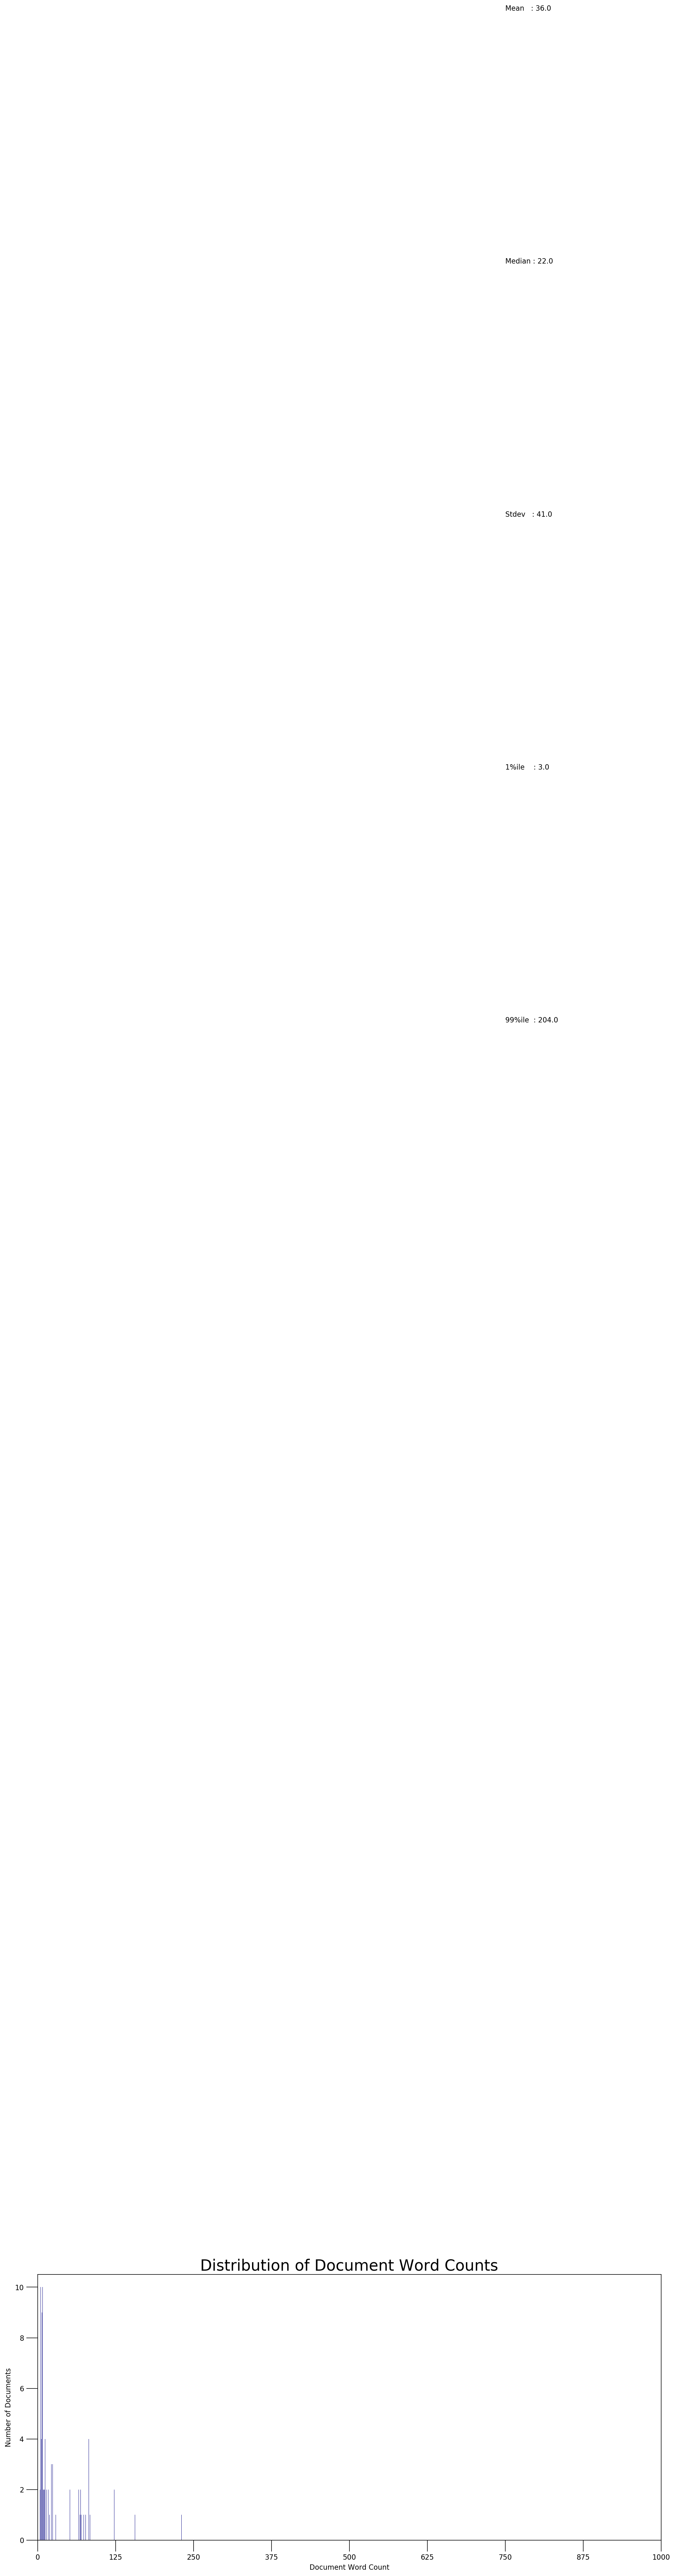

In [55]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 100), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



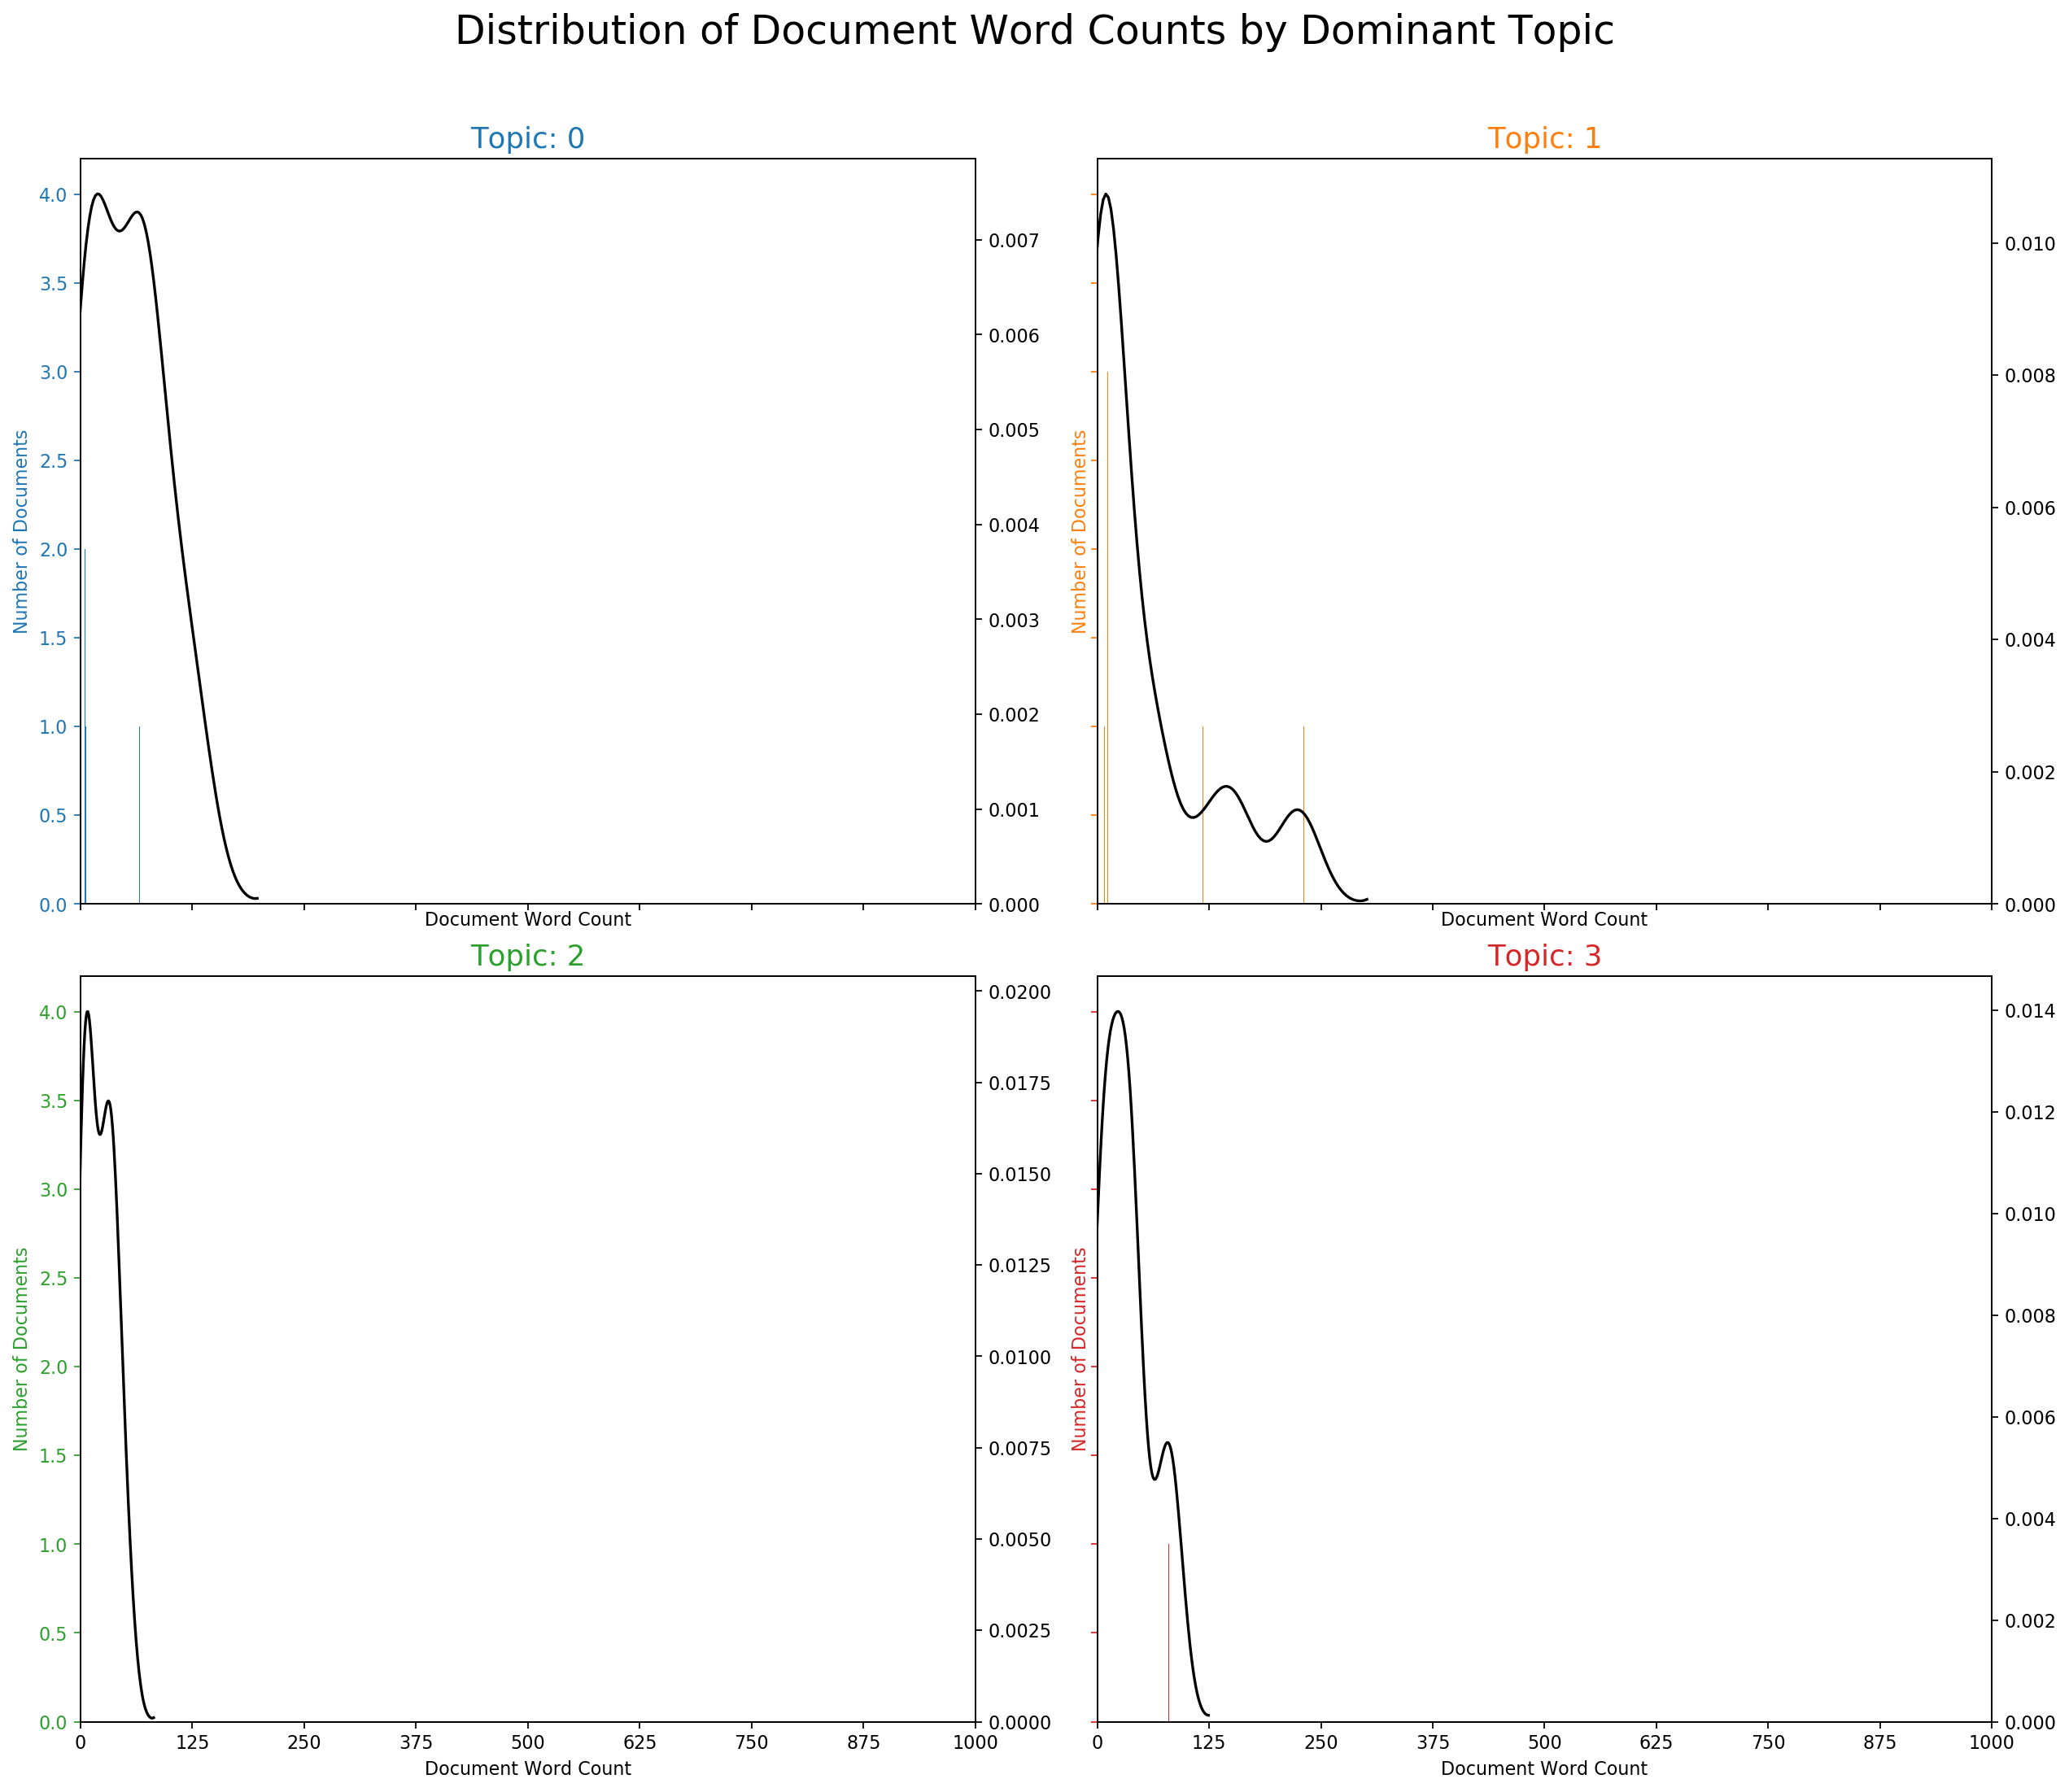

In [56]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

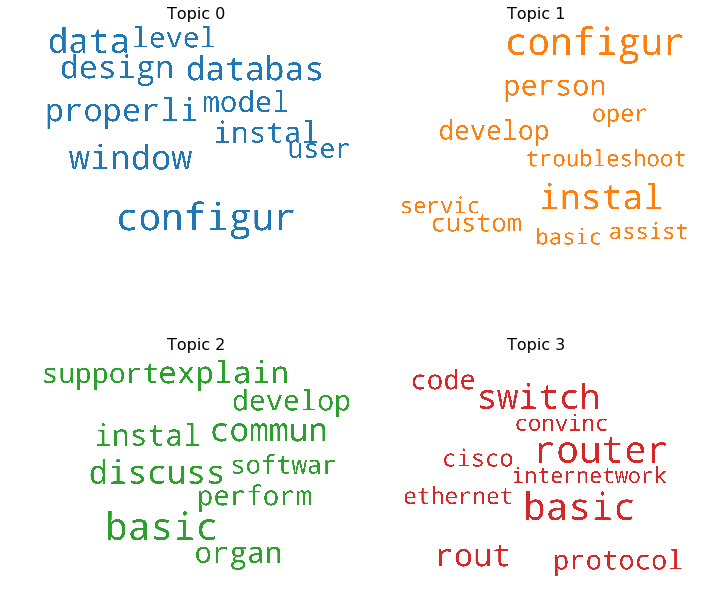

In [57]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

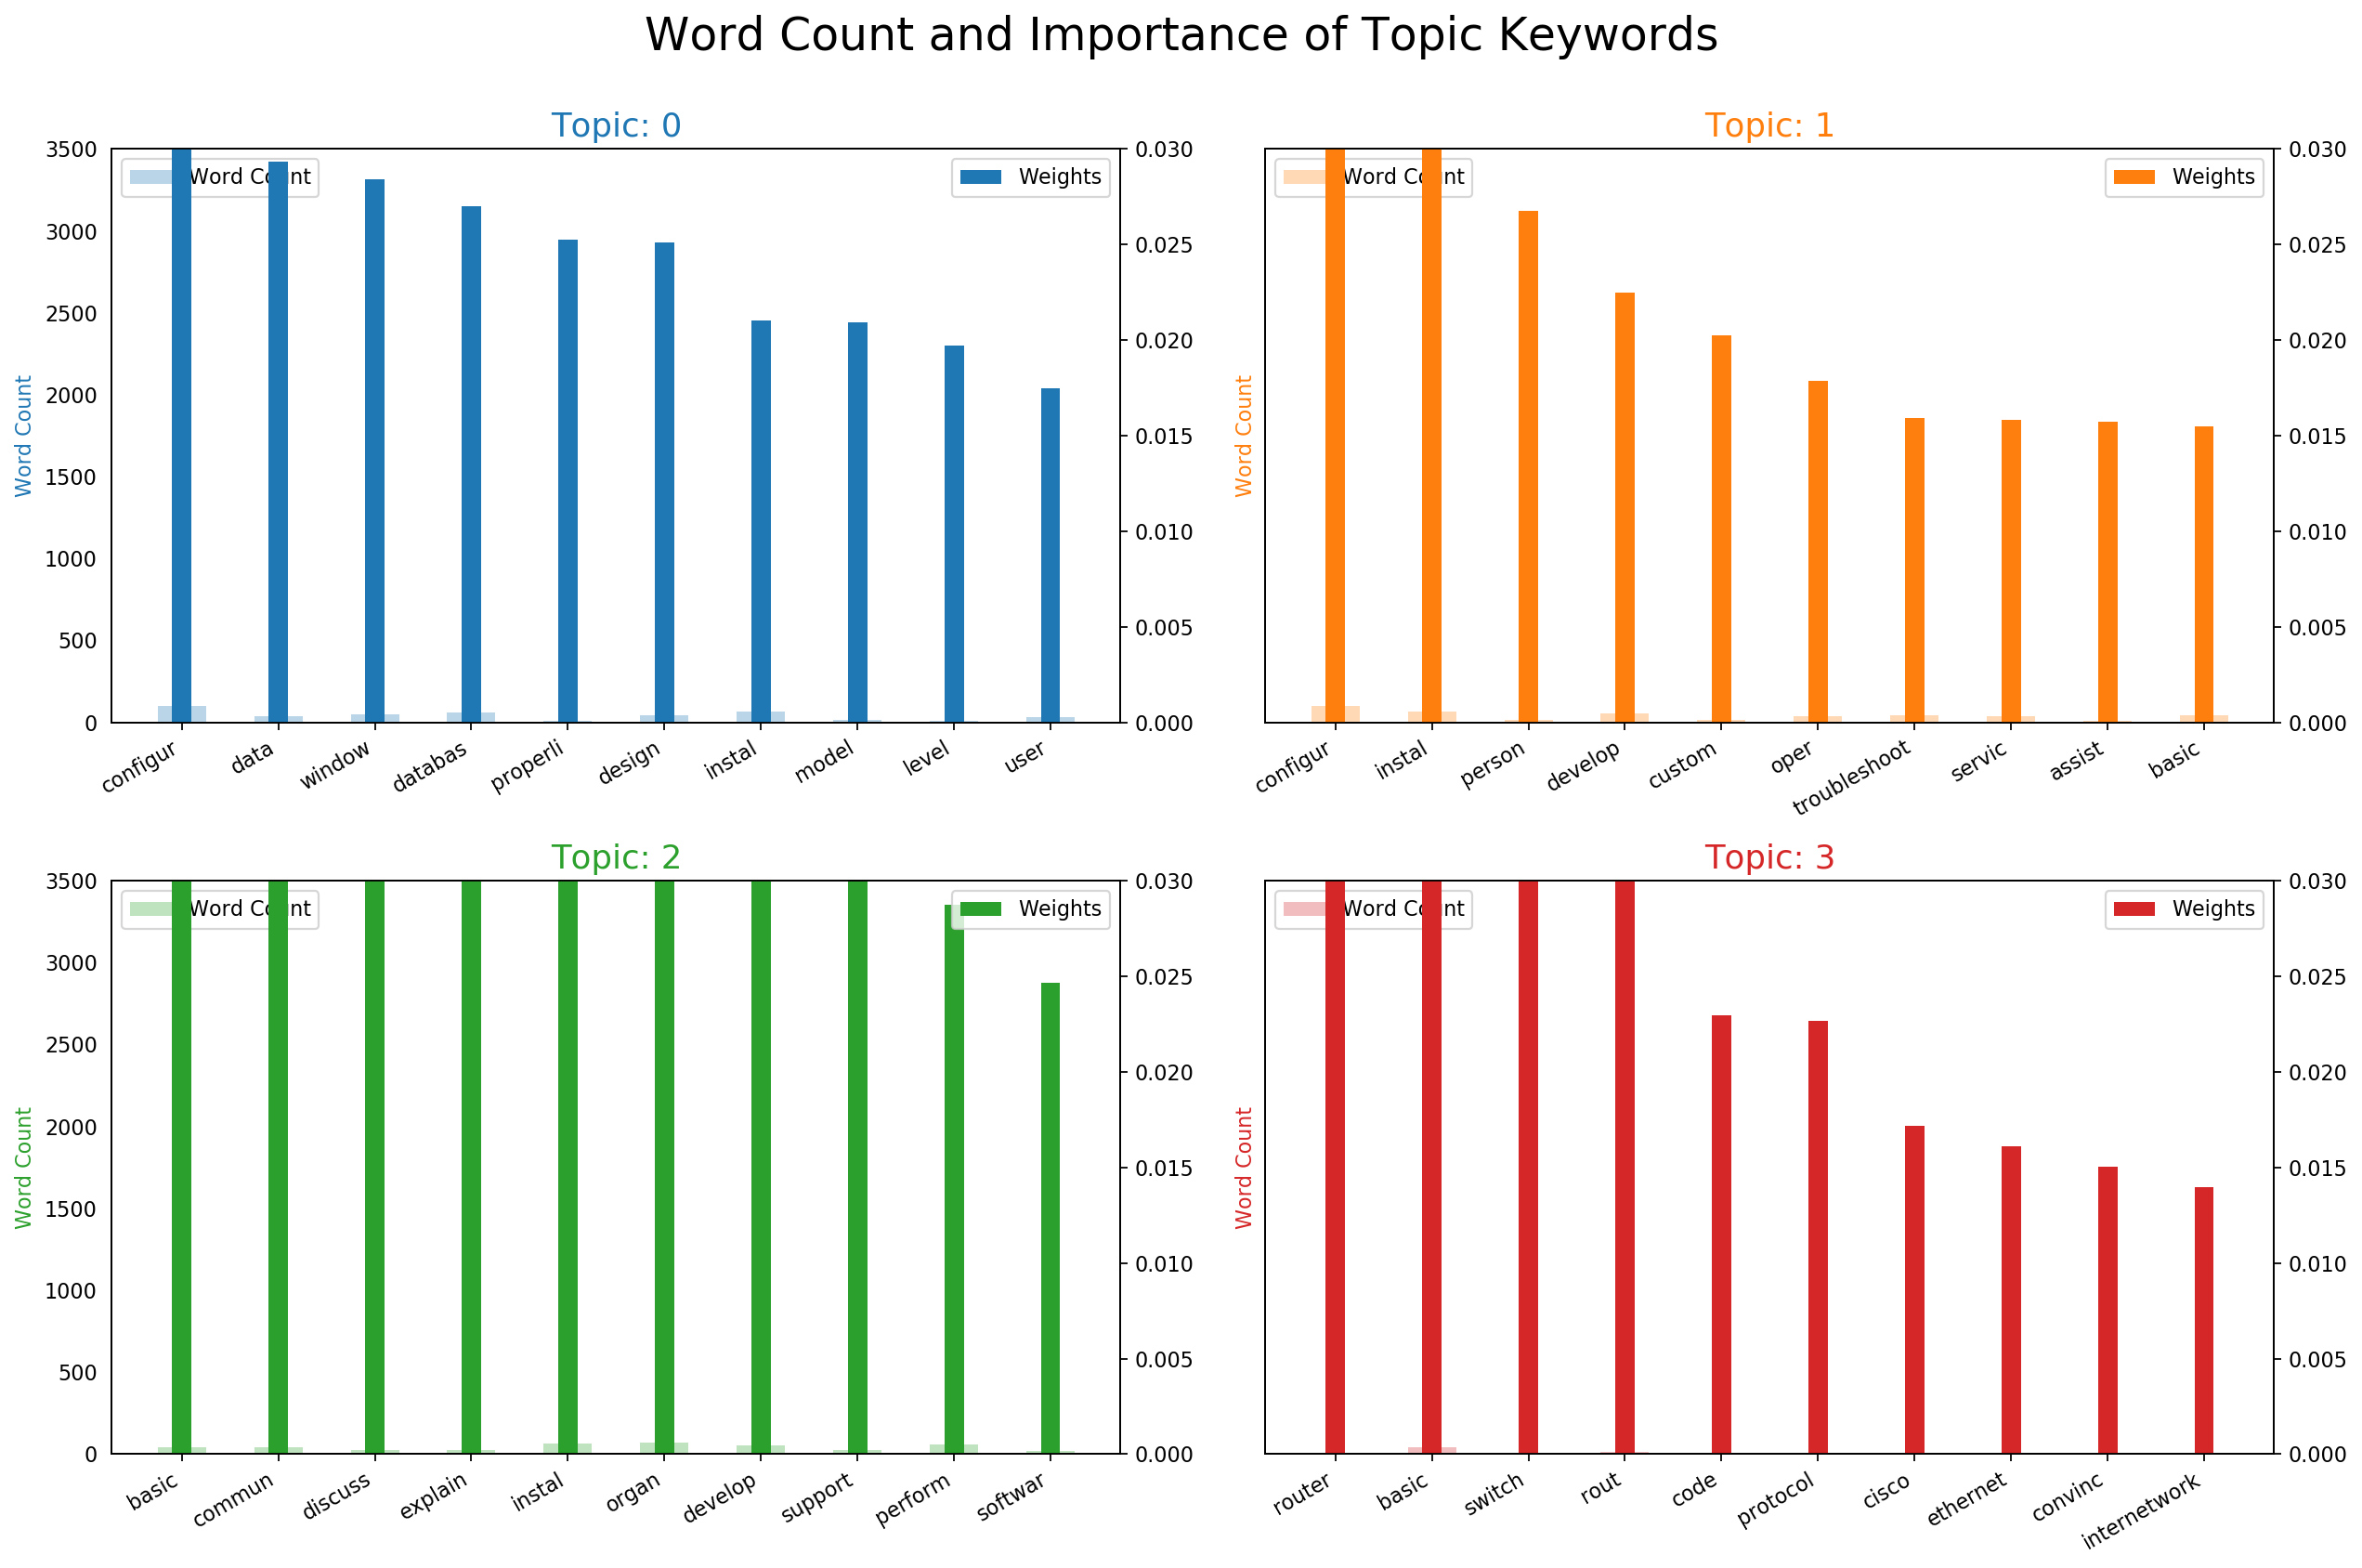

In [58]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_words for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

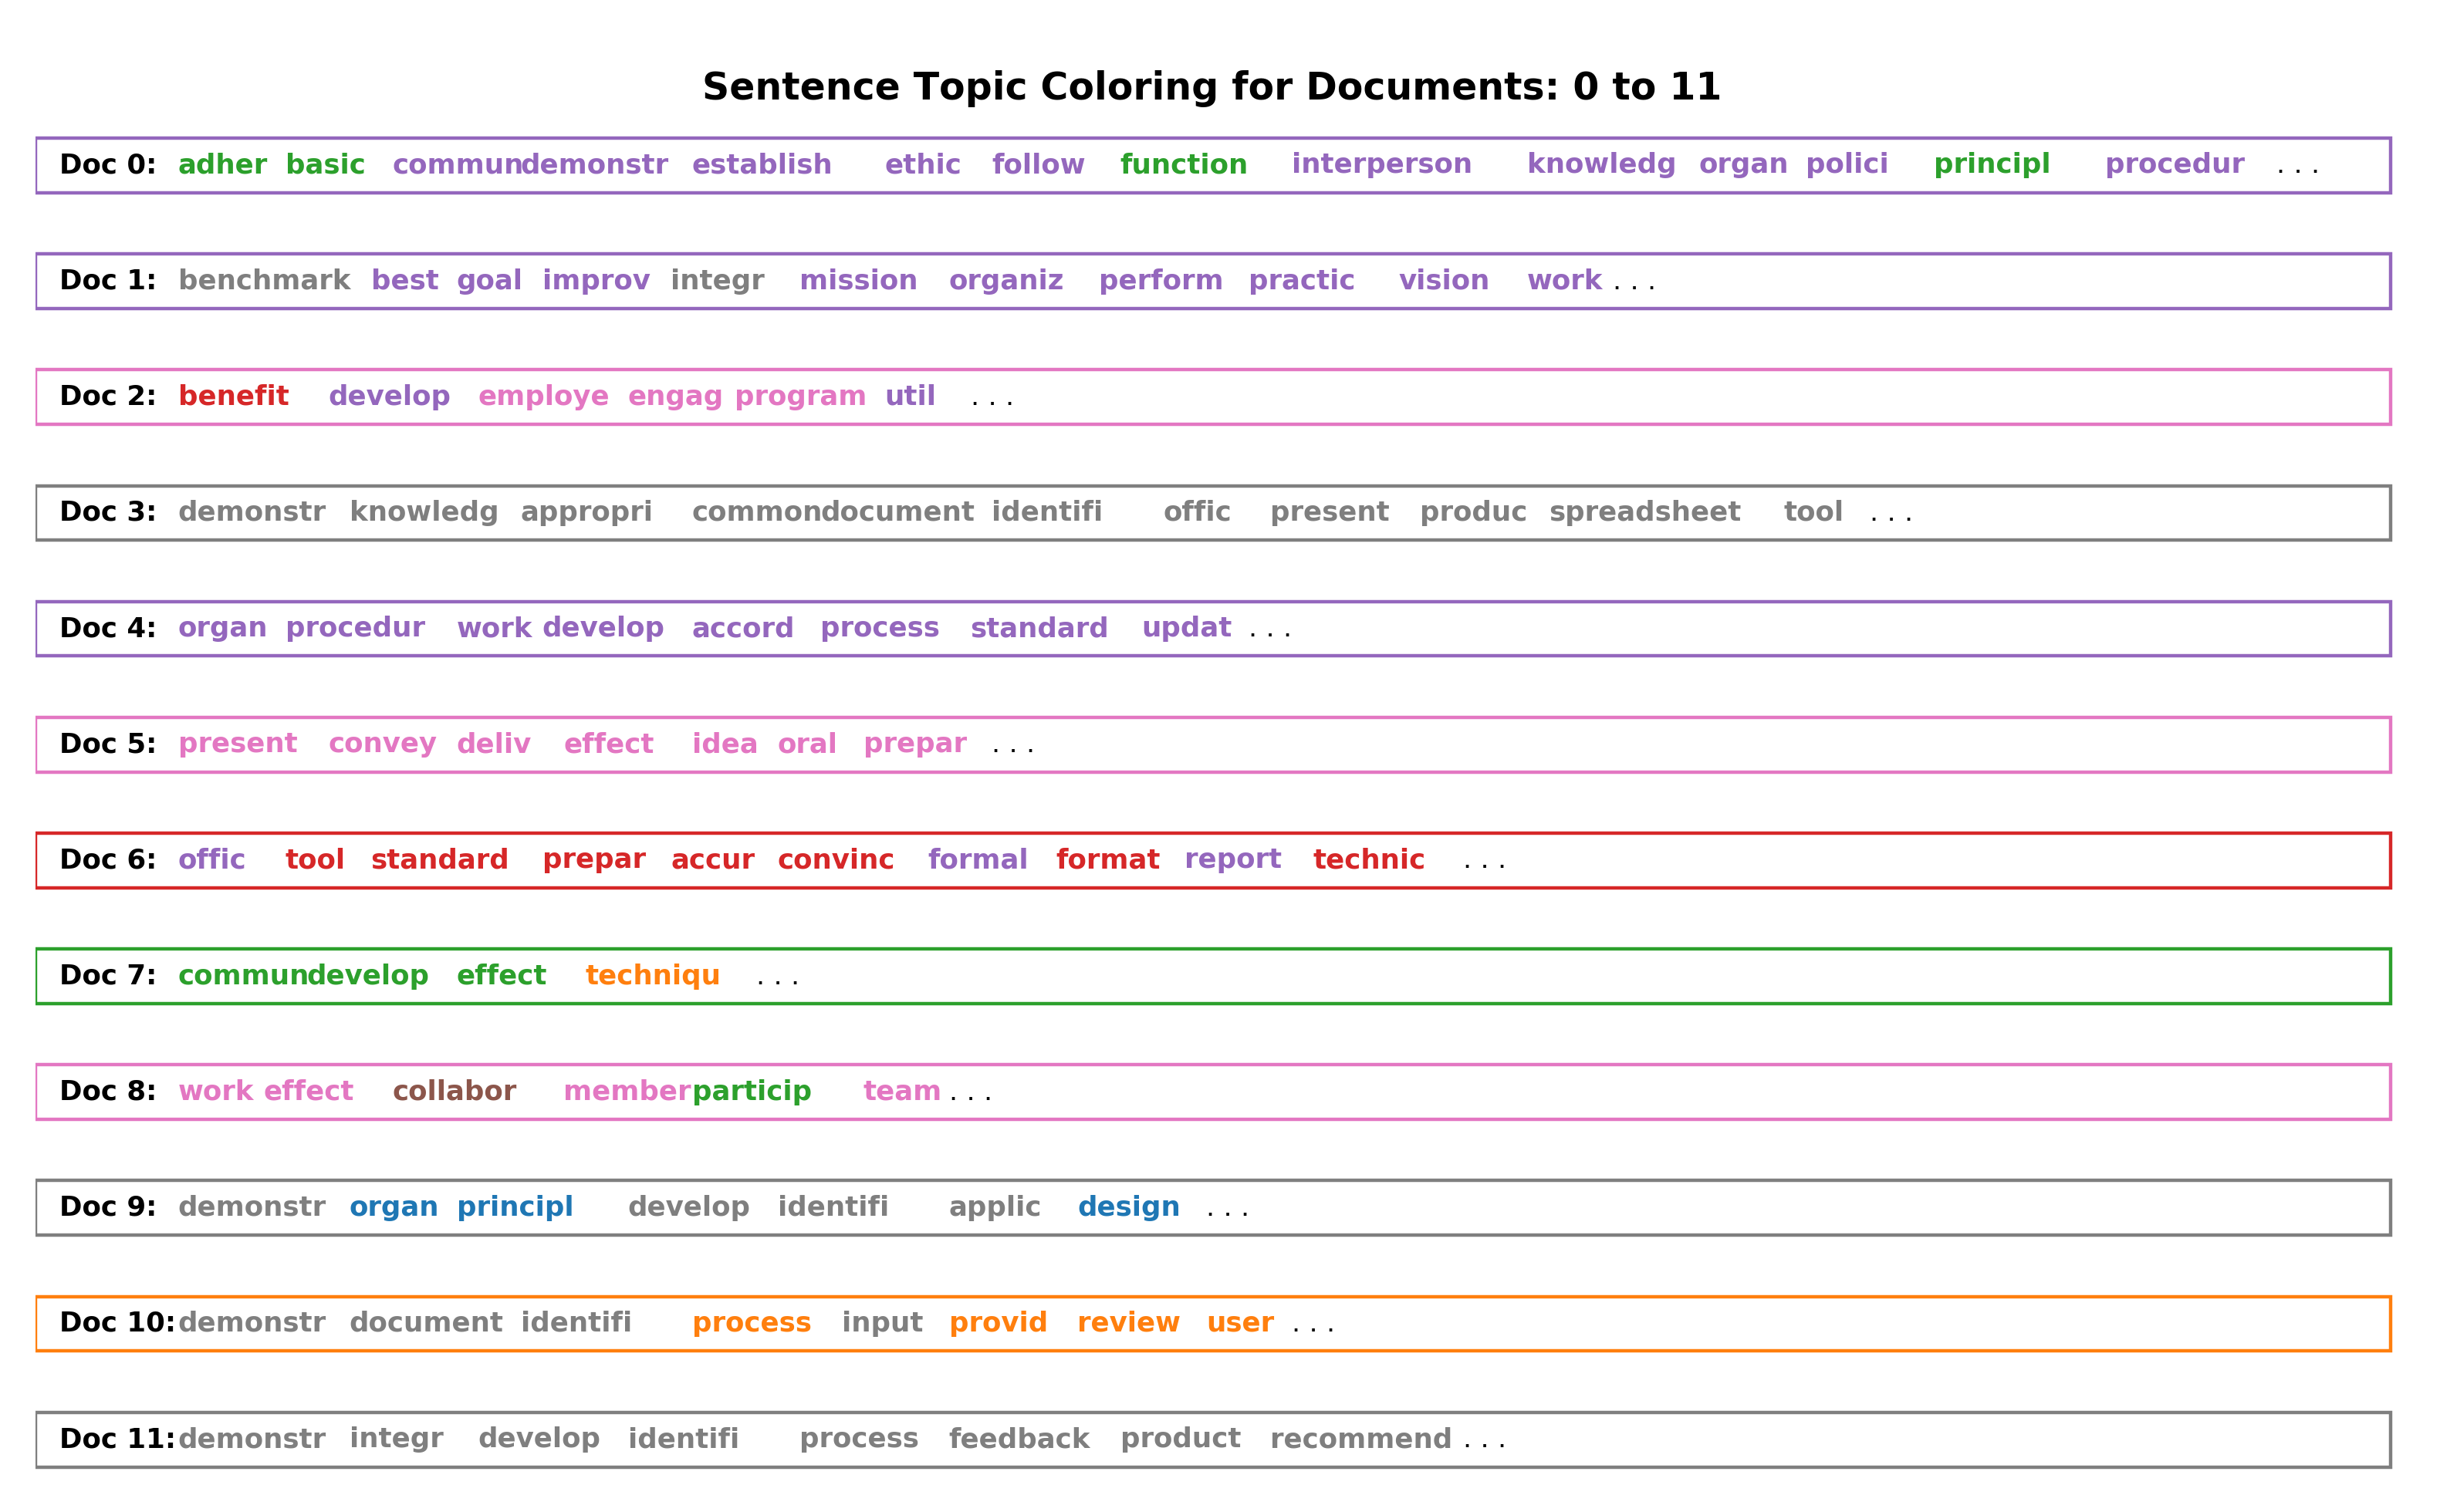

In [59]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()    

In [60]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

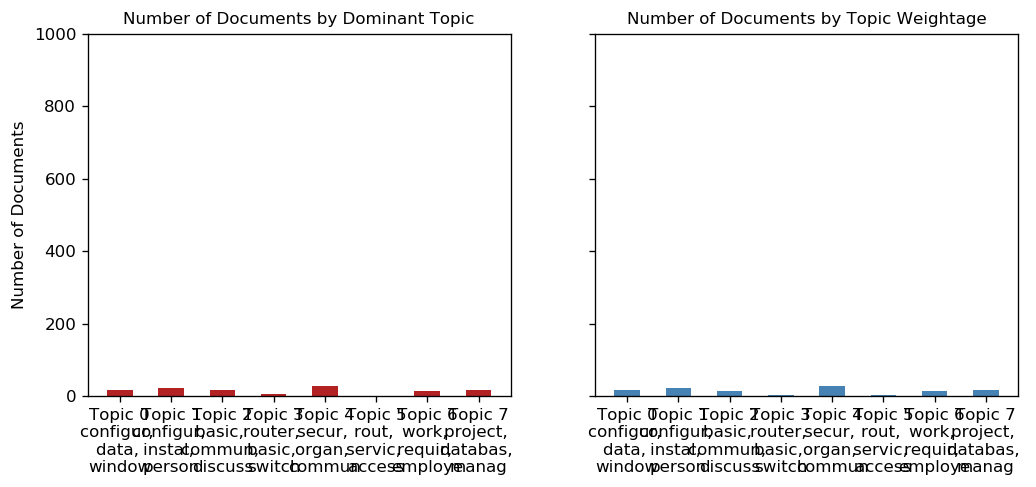

In [61]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 1000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

In [62]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 123 samples in 0.000s...
[t-SNE] Computed neighbors for 123 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 123 / 123
[t-SNE] Mean sigma: 0.076508
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.379417
[t-SNE] Error after 950 iterations: 0.128062


Loading BokehJS ...

In [63]:
for index, score in sorted(lda_model[corpus_cc], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

IndexError: index 888 is out of bounds for axis 1 with size 756

In [ ]:
vector = lda_model[corpus_cc]

In [ ]:
print(vector)

In [ ]:
print(id2word_cc)